### Задача №1

1) Какие гипотезы называются простыми, а какие сложными?
<li>Простой гипотезой называют предположение, состоящее в том, что неизвестная функция F(t)  отвечает некоторому совершенно конкретному вероятностному распределению.<li>
Сложной гипотезой называют предположение о том, что неизвестная функция F(t) принадлежит некоторому множеству распределений, состоящему из более чем одного элемента.


2) Чем отличаются параметрические критерии от непараметрических? Когда используют парамет.критерии?
<li> Критерий различия называют параметрическим, если он основан на конкретном типе распределения генеральной совокупности (как правило, нормальном) или использует параметры этой совокупности (средние, дисперсии и т.д.). Критерий различия называют непараметрическим, если он не базируется на предположении о типе распределения генеральной совокупности и не использует параметры этой совокупности.<li>
    Когда выборки взяты из нормально распределенных генеральных совокупностей, следует отдавать предпочтение параметрическим критериям.

3) Что такое уровень значимости? Что такое фактический уровень значимости?
<li>Уровень значимости статистического теста — допустимая для данной задачи вероятность ошибки первого рода (ложноположительного решения, false positive), то есть вероятность отклонить нулевую гипотезу, когда на самом деле она верна.<li>
    Фактический уровень значимости или пи-величина (p-value) — это наименьшая величина уровня значимости, при которой нулевая гипотеза отвергается для данного значения статистики критерия.

4) С помощью каких критериев можно проверить нормальность выборки?
<li>Критерий Шапиро-Уилка, QQ-график, Критерий хи-квадрат
   

5)Что такое ранг наблюдений? Когда предпочтительнее использовать ранговые критерии?
<li>Ранг - это последовательное число, определяющее специальное наблюдение в выборке, отсортированной по значениям наблюдений, и поэтому отражающее порядковую связь данного наблюдения с другими в выборке.
    

### Задача №2

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel('employees.xls')
data.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


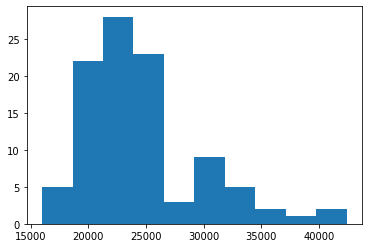

In [6]:
plt.hist(data.SALARY)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


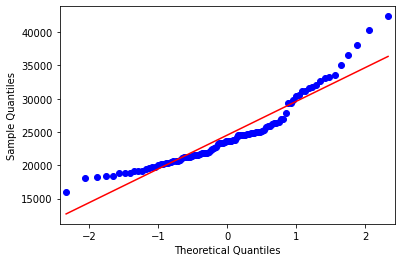

In [7]:
from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

qqplot(data.SALARY, line = 's')
plt.show()

In [8]:
stats.shapiro(data.SALARY)

ShapiroResult(statistic=0.9015016555786133, pvalue=1.6645467439957429e-06)

In [9]:
stats.jarque_bera(data.SALARY)

Jarque_beraResult(statistic=34.06327990738705, pvalue=4.011000820369759e-08)

Нормальность отвергается!

### Задача №3

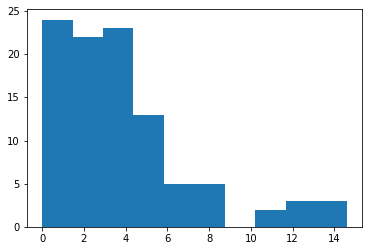

In [12]:
data3 = pd.read_csv('sample.csv')
plt.hist(data3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


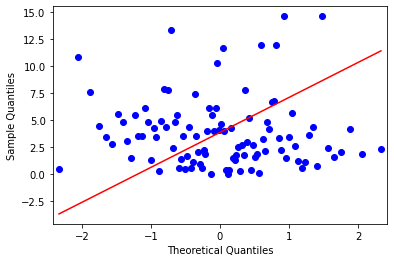

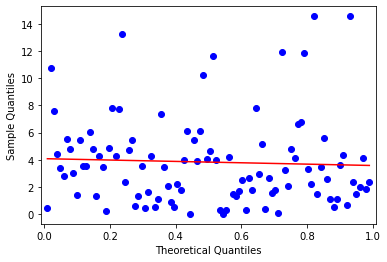

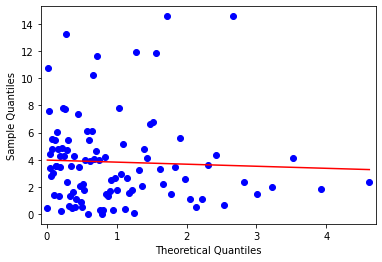

In [34]:
qqplot(data3,line = 's')
qqplot(data3,stats.uniform, line = 'r')
qqplot(data3,stats.expon, line = 'r')
plt.show()

In [49]:
print(stats.kstest(data3, stats.expon.cdf))
print(stats.kstest(data3, stats.uniform.cdf))
print(stats.kstest(data3, stats.beta.cdf, args=(2,2)))
print(stats.shapiro(data3))

KstestResult(statistic=0.9999995337941583, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8628283739089966, pvalue=3.6403054792799594e-08)


### Задача №4

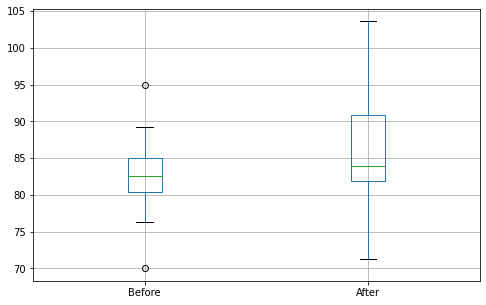

In [67]:
data4 = pd.read_csv('anorexia.txt', sep = '\t')
data4.boxplot(figsize=(8,5))
plt.show()

In [54]:
sample1 = data4['Before']
sample2 = data4['After']

In [60]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(sample1 - sample2)

(-3.5, 0.26493089646101)

Нулевая гипотеза НЕ отвергается

In [62]:
stats.wilcoxon(sample1,sample2)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [63]:
stats.wilcoxon(sample1,sample2, alternative='less')

WilcoxonResult(statistic=131.5, pvalue=0.031459861313013336)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


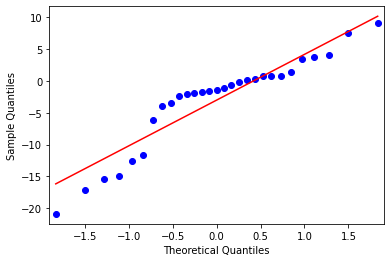

ShapiroResult(statistic=0.8961783051490784, pvalue=0.007945147342979908)

In [69]:
qqplot(sample1-sample2, line='s')
plt.show()
stats.shapiro(sample1-sample2)

Критерий Шапиро-Уилка отвергает гипотезу о нормальности данных. Поэтому чтобы протестировать значимость этого различия мы будем использовать критерий Манна-Уитни.

In [68]:
from scipy.stats import mannwhitneyu

mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=320.5, pvalue=0.06087747429977483)

С помощью "ящиков с усами" мы заметили, что вес до терапии меньше, чем после. С помощью критериев однородности, мы убедились, что эти различия значимы.

### Задача №5

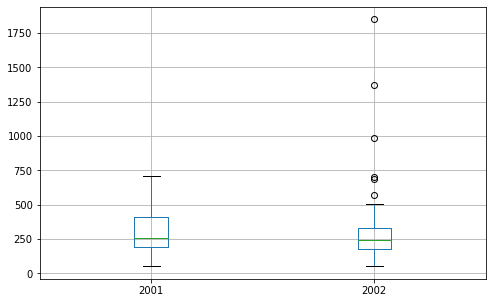

In [131]:
data5 = pd.read_csv('seattle.txt', sep = '\t')
s1 = data5[data5['Year'] == 2001].drop('Year',1).reset_index(drop=True).rename(columns={'Price': '2001'})
s2 = data5[data5['Year'] == 2002].drop('Year',1).reset_index(drop=True).rename(columns={'Price': '2002'})
df = pd.concat([s1, s2], axis =1)
df.boxplot(figsize=(8,5))
plt.show()

In [141]:
sample1 = df['2001']
sample2 = df['2002']

In [144]:
stats.ks_2samp(sample1,sample2)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

In [145]:
stats.ks_2samp(sample1,sample2, alternative='less')

KstestResult(statistic=0.14, pvalue=0.37779784844449826)

In [138]:
stats.mannwhitneyu(sample1,sample2, alternative='two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

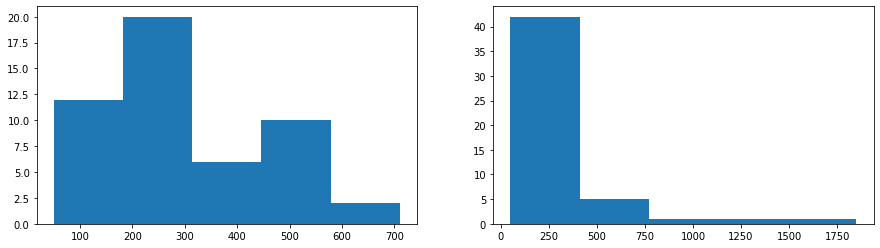

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


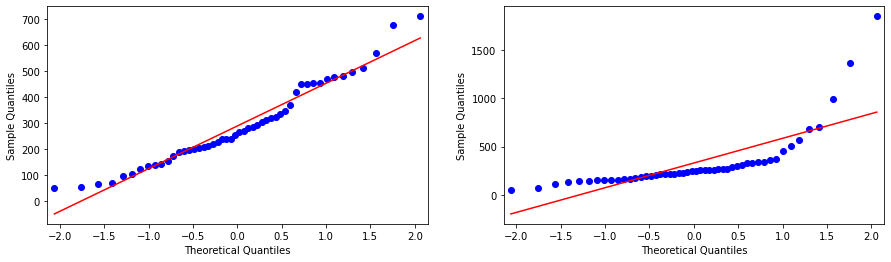

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42235167114691463)

In [143]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

ax1.hist(sample1, bins=5)
ax2.hist(sample2, bins=5)

plt.show()


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2)

plt.show()
stats.ttest_ind(sample1, sample2)

С помощью "ящиков с усами" мы заметили, что цены в 2002 году выше, чем 2001. С помощью критериев однородности, мы убедились, что эти различия НЕзначимы.

### Задача №6

In [153]:
data6 = pd.read_csv('methylphenidate.txt', sep = ' ')
data6.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


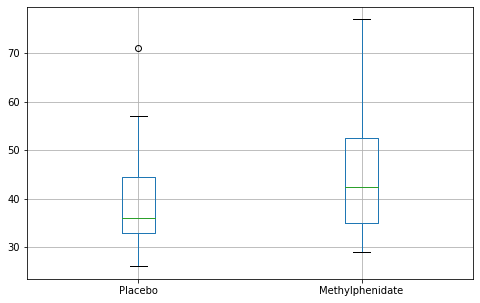

In [156]:
data6.boxplot(figsize=(8,5))
plt.show()
sample1 = data6['Placebo']
sample2 = data6['Methylphenidate']

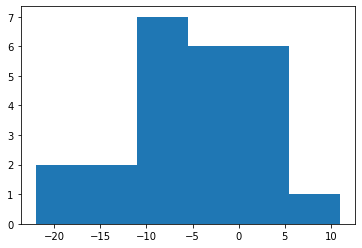

(-5.0, 0.06391465663909912)

In [159]:
plt.figure(figsize=(6,4))
plt.hist(sample1-sample2, bins=6)
plt.show()
sign_test(sample1-sample2)

In [160]:
stats.wilcoxon(sample1,sample2)

WilcoxonResult(statistic=48.5, pvalue=0.0025163888931274414)

In [161]:
stats.wilcoxon(sample1,sample2, alternative='less')

WilcoxonResult(statistic=48.5, pvalue=0.0012581944465637207)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


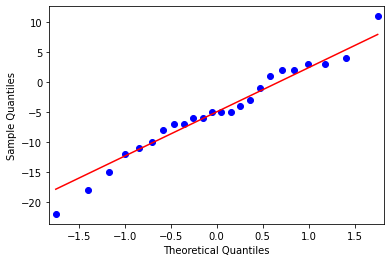

ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249)

In [162]:
qqplot(sample1-sample2, line='s')
plt.show()
stats.shapiro(sample1-sample2)

In [163]:
stats.ttest_rel(sample1, sample2)

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

In [169]:

np.median([[sample2[i] - sample1[j] for j in range(len(sample1))] for i in range(len(sample2))])

4.0

С помощью "ящиков с усами" мы заметили, что есть изменения после приема препарата. С помощью критериев однородности, мы убедились, что эти различия значимы.

### Задача №7

In [170]:
data7 = pd.read_csv('mtcars.csv')
data7.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


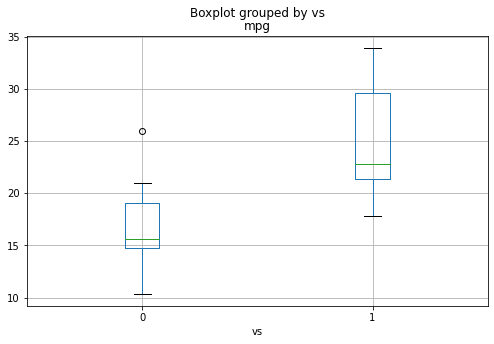

In [172]:
data7.boxplot(column='mpg', by='vs',figsize=(8,5))
plt.show()

In [183]:
sample1 = data7[data7['vs'] == 0]['mpg'].to_numpy()
sample2 = data7[data7['vs'] == 1]['mpg'].to_numpy()

Критерий Колмогорова-Смирнова

In [184]:
stats.ks_2samp(sample1,sample2)

KstestResult(statistic=0.7301587301587301, pvalue=0.0001328071108758211)

In [189]:
stats.ks_2samp(sample1,sample2, alternative='less')

KstestResult(statistic=0.0, pvalue=1.0)

In [186]:
stats.ks_2samp(sample1,sample2, alternative='greater')

KstestResult(statistic=0.7301587301587301, pvalue=6.640355543790075e-05)

Критерий Манна-Уитни

In [190]:
stats.mannwhitneyu(sample1,sample2, alternative='two-sided')

MannwhitneyuResult(statistic=22.5, pvalue=9.034471700053182e-05)

In [191]:
stats.mannwhitneyu(sample1,sample2)

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)

In [192]:
stats.mannwhitneyu(sample1,sample2, alternative='less')

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)

Критерий Стьюдента ( 𝑡 -тест)

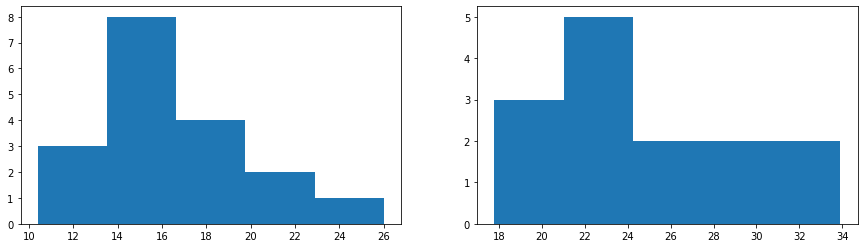

In [194]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

ax1.hist(sample1, bins=5)
ax2.hist(sample2, bins=5)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


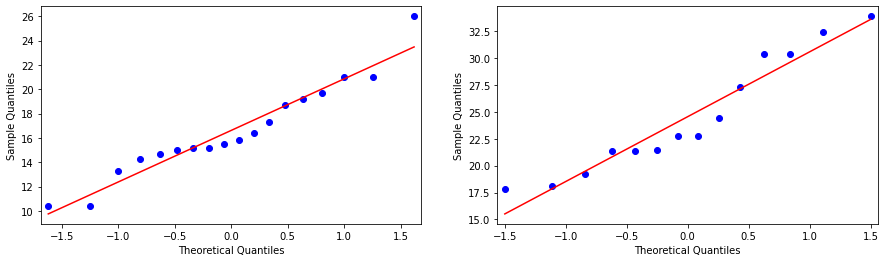

In [195]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2)

plt.show()

In [196]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-4.864384956122782, pvalue=3.415937254419951e-05)

С помощью "ящиков с усами" мы заметили, что расход топлива у одного типа двигателя больше, чем у другого. С помощью критериев однородности, мы убедились, что эти различия значимы.

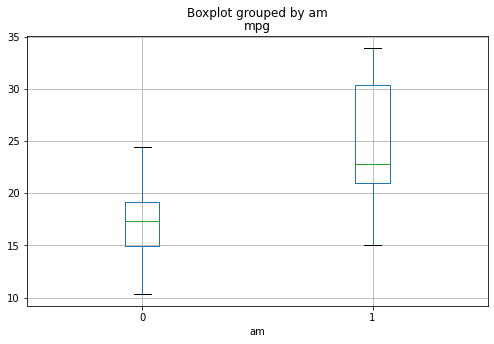

In [213]:
sample3 = data7[data7['am'] == 0]['mpg'].to_numpy()
sample4 = data7[data7['am'] == 1]['mpg'].to_numpy()
data7.boxplot(column='mpg', by='am',figsize=(8,5))
plt.show()

Критерий Колмогорова-Смирнова

In [198]:
stats.ks_2samp(sample4,sample3)

KstestResult(statistic=0.6356275303643725, pvalue=0.00194012440784197)

In [207]:
stats.ks_2samp(sample3,sample4, alternative='less')

KstestResult(statistic=0.0, pvalue=1.0)

Критерий Манна-Уитни

In [208]:
stats.mannwhitneyu(sample3,sample4)

MannwhitneyuResult(statistic=42.0, pvalue=0.0009356956665892771)

In [209]:
stats.mannwhitneyu(sample3,sample4, alternative='two-sided')

MannwhitneyuResult(statistic=42.0, pvalue=0.0018713913331785542)

Критерий Стьюдента ( 𝑡 -тест)

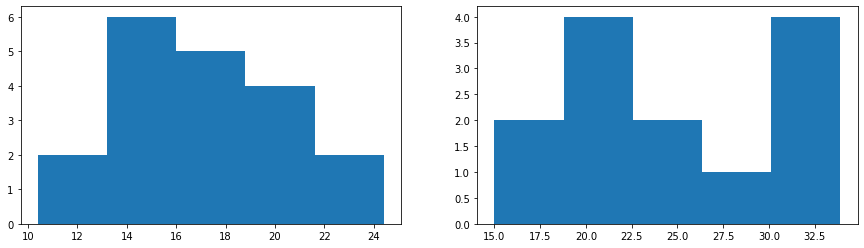

In [210]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

ax1.hist(sample3, bins=5)
ax2.hist(sample4, bins=5)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


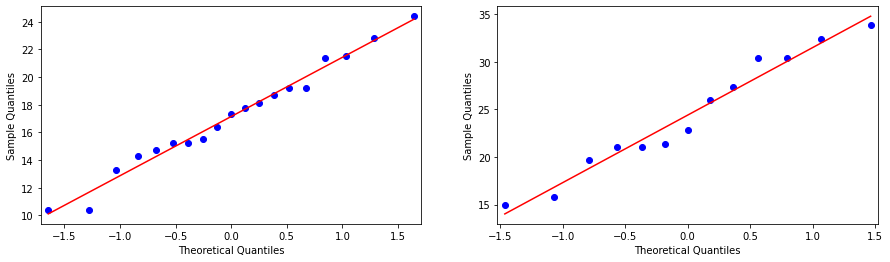

In [211]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample3, line='r', ax=ax1)
qqplot(sample4, line='r', ax=ax2)

plt.show()

In [212]:
stats.ttest_ind(sample3, sample4)

Ttest_indResult(statistic=-4.106126983100689, pvalue=0.0002850207439350686)

С помощью "ящиков с усами" мы заметили, что расход топлива у машин с автоматической коробкой передач меньше, чем у машин с ручной. С помощью критериев однородности, мы убедились, что эти различия значимы.